In [5]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout


train_df = pd.read_csv("Daten_mit_Tourismuswerten_und_imputierten_Wetterdaten/train_df.csv")
validation_df = pd.read_csv("Daten_mit_Tourismuswerten_und_imputierten_Wetterdaten/validation_df.csv")

training_features = train_df.drop(columns=['Datum', "Umsatz"])
training_labels = train_df["Umsatz"]
validation_features = validation_df.drop(columns=['Datum', "Umsatz"])
validation_labels = validation_df["Umsatz"]

model = Sequential([
  InputLayer(shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(100, activation='relu'),
  Dense(40, activation='relu'),
  Dense(10, activation='relu'),
  Dense(1)
])

model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=20,
                    validation_data=(validation_features, validation_labels))

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 28)             │           112 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │         2,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 40)             │         4,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,473 (29.19 KB)

 Trainable params: 7,417 (28.97 KB)

 Non-trainable params: 56 (224.00 B)

In [6]:
print(training_features.columns)

Index(['KielerWoche', 'rain_weather', 'snow_weather', 'Feiertag',
       'Season_Temp_Fall_low', 'Season_Temp_Fall_middle', 'Ankuenfte',
       'Uebernachtungen', 'Season_Temp_Spring_high', 'Season_Temp_Spring_low',
       'Season_Temp_Spring_middle', 'Season_Temp_Summer_high',
       'Season_Temp_Summer_low', 'Season_Temp_Summer_middle',
       'Season_Temp_Winter_high', 'Season_Temp_Winter_low',
       'Season_Temp_Winter_middle', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Saturday', 'Sunday', 'Warengruppe_2', 'Warengruppe_3',
       'Warengruppe_4', 'Warengruppe_5', 'Warengruppe_6'],
      dtype='object')


In [7]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/20


235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 47628.9180 - val_loss: 4955.3579
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7652.1147 - val_loss: 4971.2920
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6324.3223 - val_loss: 3985.5352
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5532.2568 - val_loss: 4647.9805
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6956.9917 - val_loss: 4361.7627
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5153.7456 - val_loss: 4769.0352
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5831.1670 - val_loss: 4145.4395
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5334.6113 - val_loss: 3995.2952
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6790.2456 - val_loss: 5026.0454
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6094.6641 - val_loss: 3694.9944
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4914.4438 - val_loss: 3543.1

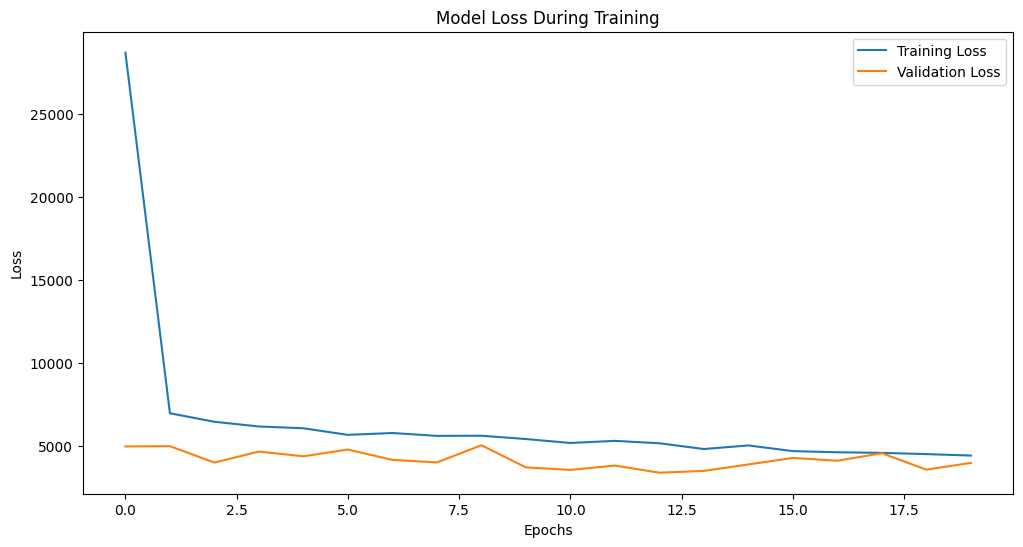

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
import numpy as np

""" def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100 """

from sklearn.metrics import mean_absolute_percentage_error

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)

mape = mean_absolute_percentage_error(validation_labels, validation_predictions)
mape2 = mean_absolute_percentage_error(training_labels, training_predictions)

print(f"MAPE on the Validation Data: {mape:.2f}")
print(f"MAPE on the Training Data: {mape2:.2f}")

""" print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%") """

  1/235 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step
MAPE on the Validation Data: 0.24
MAPE on the Training Data: 0.20


' print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")\nprint(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%") '

In [10]:
mask1 = (validation_features['Warengruppe_2'] == 0) & (validation_features['Warengruppe_3'] == 0) & (validation_features['Warengruppe_4'] == 0) & (validation_features['Warengruppe_5'] == 0) & (validation_features['Warengruppe_6'] == 0)

validation_predictions_warengruppe1 = validation_predictions[mask1]
validation_labels_warengruppe1 = validation_labels[mask1]

warengruppe1_mape = mean_absolute_percentage_error(validation_labels_warengruppe1, validation_predictions_warengruppe1)


# Create masks for each Warengruppe
mask2 = (validation_features['Warengruppe_2'] == 1)
mask3 = (validation_features['Warengruppe_3'] == 1)
mask4 = (validation_features['Warengruppe_4'] == 1)
mask5 = (validation_features['Warengruppe_5'] == 1)
mask6 = (validation_features['Warengruppe_6'] == 1)

# Calculate MAPE for each Warengruppe
validation_predictions_warengruppe2 = validation_predictions[mask2]
validation_labels_warengruppe2 = validation_labels[mask2]
warengruppe2_mape = mean_absolute_percentage_error(validation_labels_warengruppe2, validation_predictions_warengruppe2)

validation_predictions_warengruppe3 = validation_predictions[mask3]
validation_labels_warengruppe3 = validation_labels[mask3]
warengruppe3_mape = mean_absolute_percentage_error(validation_labels_warengruppe3, validation_predictions_warengruppe3)

validation_predictions_warengruppe4 = validation_predictions[mask4]
validation_labels_warengruppe4 = validation_labels[mask4]
warengruppe4_mape = mean_absolute_percentage_error(validation_labels_warengruppe4, validation_predictions_warengruppe4)

validation_predictions_warengruppe5 = validation_predictions[mask5]
validation_labels_warengruppe5 = validation_labels[mask5]
warengruppe5_mape = mean_absolute_percentage_error(validation_labels_warengruppe5, validation_predictions_warengruppe5)

validation_predictions_warengruppe6 = validation_predictions[mask6]
validation_labels_warengruppe6 = validation_labels[mask6]
warengruppe6_mape = mean_absolute_percentage_error(validation_labels_warengruppe6, validation_predictions_warengruppe6)

print(f"MAPE for Warengruppe 1: {warengruppe1_mape:.2f}")
print(f"MAPE for Warengruppe 2: {warengruppe2_mape:.2f}")
print(f"MAPE for Warengruppe 3: {warengruppe3_mape:.2f}")
print(f"MAPE for Warengruppe 4: {warengruppe4_mape:.2f}")
print(f"MAPE for Warengruppe 5: {warengruppe5_mape:.2f}")
print(f"MAPE for Warengruppe 6: {warengruppe6_mape:.2f}")

MAPE for Warengruppe 1: 0.21
MAPE for Warengruppe 2: 0.23
MAPE for Warengruppe 3: 0.25
MAPE for Warengruppe 4: 0.27
MAPE for Warengruppe 5: 0.20
MAPE for Warengruppe 6: 0.55


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


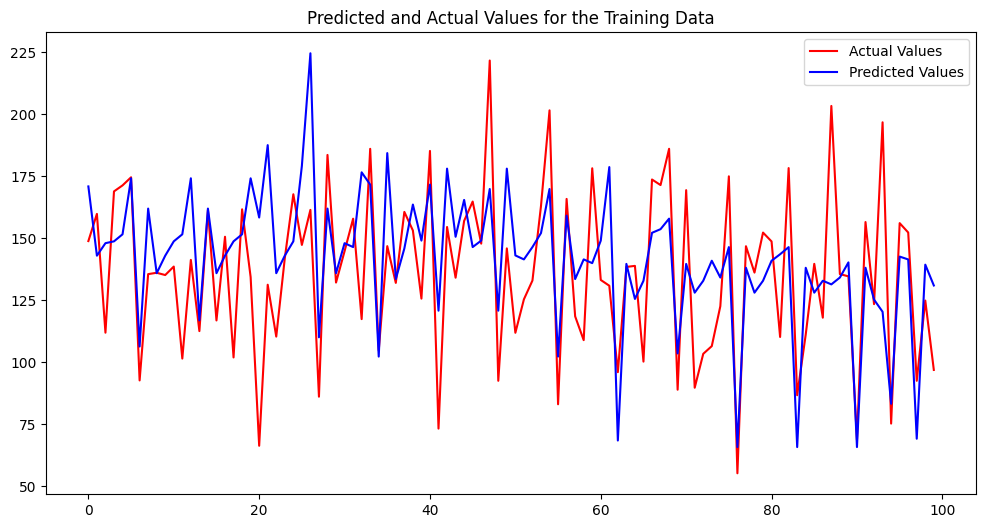

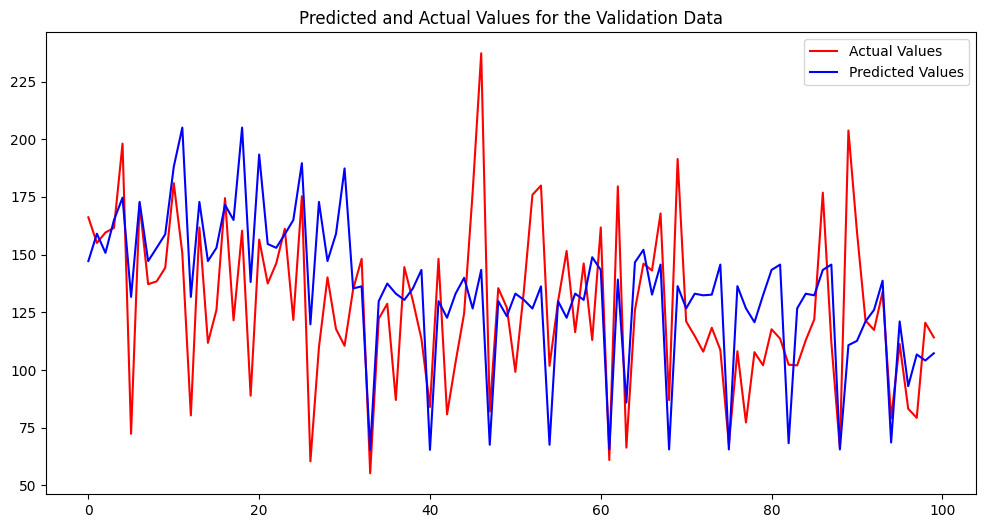

In [14]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')

In [12]:
test_df = pd.read_csv("Daten_mit_Tourismuswerten_und_imputierten_Wetterdaten/test_df.csv")

test_features = test_df.drop(columns=['id', "Datum", "Umsatz"])

predictions = model.predict(test_features)

test_df['Umsatz'] = predictions

submission_df = test_df[['id', 'Umsatz']]

submission_df.to_csv("submission.csv", index=False)

 1/58 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
